<div style="text-align: left;"><img src="https://i.imgur.com/BC2sAdw.png" align="left" width="200" title="Universiteit Leiden"/ ></div>

<font color='#0C2577'><b>Improving the age at onset estimation for Huntington’s Disease using Machine Learning models on top of the Enroll-HD data</b></font>

<left><font color='#0C2577'>JC Marchiori Dias – BioInformatics Master Thesis 2023/2024 - Notebook 1</font></left> 

<left><font color='#0C2577'>Leiden University - LUMC BioSemantics Group</font></left>

#### Import Libraries

In [1]:
## Importing Relevant Python Libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


#### Options for the notebook

In [2]:
## Set options for pandas
# to have better/more output from lists/dataframes

pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)

In [26]:
# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['savefig.dpi'] = 600

#### Loading Datasets

In [4]:
## Import of pre-processed and imputed data, created by LUMC BioSemantics Group

# Enroll-HD dataset is available after the associated Consortium evaluation and approval, therefore this data cannot be 
# found elsewhere and its location here is private. 

hd_imputed_df = pd.read_csv("~/Study/HD/my_project/hd_workflow_data/data_output/aao_feature_all/imputed_dfs/New_All_cases.csv", index_col="patient_num")

#### HD Data Exploration

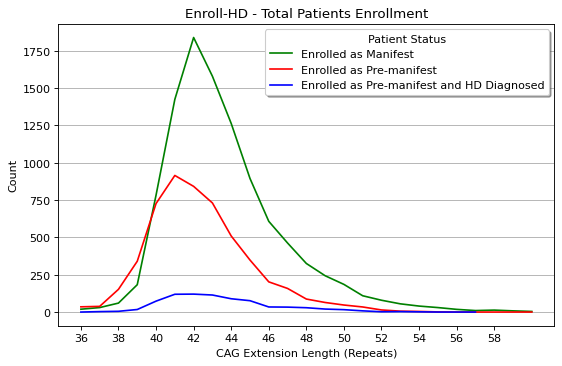

In [27]:
## Counting of Total Patients Enrolled 

std_cat1_df = hd_imputed_df[(hd_imputed_df['hddiagn']>0)&(hd_imputed_df['hdcat_0']==2.0)]
std_cat2_df = hd_imputed_df[hd_imputed_df['hdcat_0']==2.0]
std_cat3_df = hd_imputed_df[hd_imputed_df['hdcat_0']==3.0]

x1, y1 = np.unique(std_cat1_df.groupby('subjid').first()['caghigh'], return_counts=True)
x2, y2 = np.unique(std_cat2_df.groupby('subjid').first()['caghigh'], return_counts=True)
x3, y3 = np.unique(std_cat3_df.groupby('subjid').first()['caghigh'], return_counts=True)

fig, axs = plt.subplots(1,1, figsize=(8,5))
sns.lineplot(x=x3, y=y3, color='g', label='Enrolled as Manifest')
sns.lineplot(x=x2, y=y2, color='r', label='Enrolled as Pre-manifest')
sns.lineplot(x=x1, y=y1, color='b', label='Enrolled as Pre-manifest and HD Diagnosed')

plt.xticks(range(36, 60, 2))
plt.xlabel('CAG Extension Length (Repeats)')
plt.ylabel('Count')
plt.title('Enroll-HD - Total Patients Enrollment')
plt.grid(axis='y')
plt.legend(title='Patient Status', shadow=True)
plt.show()


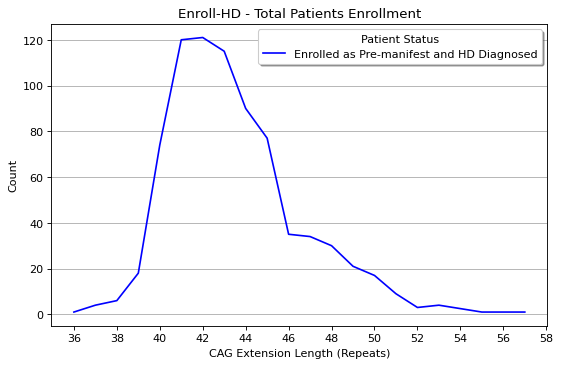

In [28]:
## Counting of Total Patients Enrolled 

std_cat1_df = hd_imputed_df[(hd_imputed_df['hddiagn']>0)&(hd_imputed_df['hdcat_0']==2.0)]
std_cat2_df = hd_imputed_df[hd_imputed_df['hdcat_0']==2.0]
std_cat3_df = hd_imputed_df[hd_imputed_df['hdcat_0']==3.0]

x1, y1 = np.unique(std_cat1_df.groupby('subjid').first()['caghigh'], return_counts=True)
x2, y2 = np.unique(std_cat2_df.groupby('subjid').first()['caghigh'], return_counts=True)
x3, y3 = np.unique(std_cat3_df.groupby('subjid').first()['caghigh'], return_counts=True)

fig, axs = plt.subplots(1,1, figsize=(8,5))
sns.lineplot(x=x1, y=y1, color='b', label='Enrolled as Pre-manifest and HD Diagnosed')

plt.xticks(range(36, 60, 2))
plt.xlabel('CAG Extension Length (Repeats)')
plt.ylabel('Count')
plt.title('Enroll-HD - Total Patients Enrollment')
plt.grid(axis='y')
plt.legend(title='Patient Status', shadow=True)
plt.show()


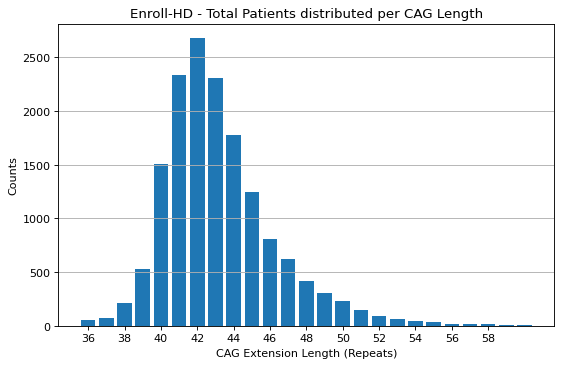

In [29]:
## Counting of Total Patients Enrolled 

x, y = np.unique(hd_imputed_df.groupby('subjid').first()['caghigh'], return_counts=True)

fig, axs = plt.subplots(1,1, figsize=(8,5))
plt.bar(x, y)
plt.xlabel('CAG Extension Length (Repeats)')
plt.ylabel('Counts')
plt.title('Enroll-HD - Total Patients distributed per CAG Length')
plt.xticks(range(36, 60, 2))
plt.grid(axis='y')
plt.show()

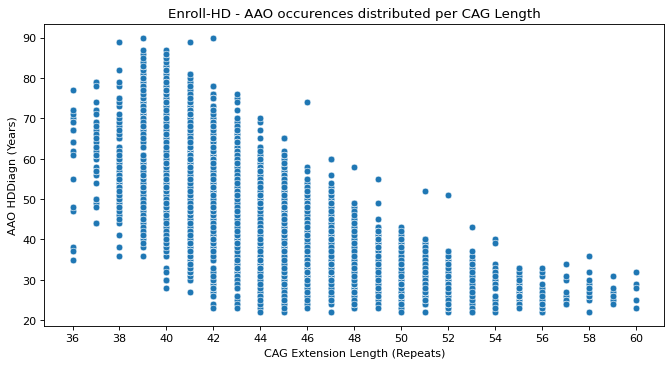

In [30]:
## Counting of Total Patients Enrolled 

feat_imp_set = hd_imputed_df.groupby('subjid').first()[['caghigh', 'hddiagn']]

fig, axs = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(data=feat_imp_set, x="caghigh", y="hddiagn")
plt.title('Enroll-HD - AAO occurences distributed per CAG Length')
plt.xticks(range(36, 61, 2))
plt.xlabel('CAG Extension Length (Repeats)')
plt.ylabel('AAO HDDiagn (Years)')
# plt.grid()
plt.show()

In [14]:
feat_imp_set.groupby('caghigh').describe()

hddiagn                                                      
          count       mean        std   min    25%   50%    75%   max
caghigh                                                              
36         20.0  60.600000  12.799671  35.0  53.25  65.5  69.25  77.0
37         33.0  62.242424   9.555857  44.0  57.00  63.0  69.00  79.0
38         65.0  59.092308  10.778629  36.0  53.00  57.0  66.00  89.0
39        200.0  64.590000  11.760675  36.0  56.00  67.0  73.00  90.0
40        837.0  63.464755  10.209540  28.0  58.00  65.0  70.00  87.0
41       1508.0  59.297745   8.828053  27.0  54.00  60.0  65.00  89.0
42       1921.0  54.986465   7.878228  23.0  50.00  56.0  60.00  90.0
43       1657.0  50.210018   7.500922  23.0  46.00  51.0  55.00  76.0
44       1319.0  46.288097   6.553418  22.0  42.00  47.0  50.00  70.0
45        942.0  43.165605   6.595184  22.0  39.00  43.0  47.00  65.0
46        623.0  40.608347   6.016916  23.0  37.00  40.0  44.00  74.0
47        484.0  38.043388   5.617941  22.0  34.00  38.0  41.00  60.0
48        347.0  35.305476   5.211598  23.0  32.00  35.0  39.00  58.0
49        254.0  34.070866   4.469804  23.0  31.00  34.0  37.00  55.0
50        195.0  32.235897   4.070987  22.0  29.00  32.0  35.00  43.0
51        118.0  31.457627   4.433062  22.0  28.25  31.0  34.00  52.0
52         80.0  30.125000   4.459026  22.0  27.00  30.0  33.00  51.0
53         60.0  28.800000   3.776825  22.0  27.00  28.0  30.25  43.0
54         37.0  28.486486   3.927267  22.0  26.00  28.0  30.00  40.0
55         31.0  28.064516   2.815854  23.0  26.00  28.0  30.00  33.0
56         20.0  25.900000   3.322966  22.0  23.00  25.0  28.00  33.0
57         12.0  26.833333   3.157483  24.0  25.00  25.5  27.75  34.0
58         12.0  27.916667   3.604501  22.0  26.00  27.5  29.25  36.0
59          9.0  26.333333   2.121320  24.0  25.00  26.0  27.00  31.0
60          5.0  27.400000   3.507136  23.0  25.00  28.0  29.00  32.0

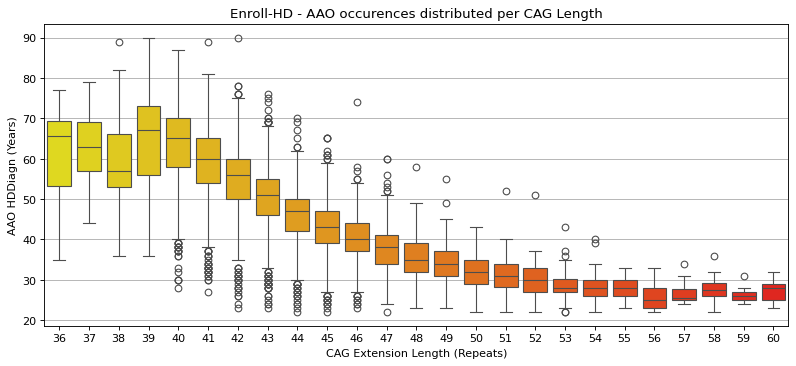

In [31]:
## Counting of Total Patients Enrolled 

feat_imp_set = hd_imputed_df.groupby('subjid').first()[['caghigh', 'hddiagn']]

fig, axs = plt.subplots(1,1, figsize=(12,5))
sns.boxplot(data=feat_imp_set, x="caghigh", y="hddiagn", palette='autumn_r')
plt.title('Enroll-HD - AAO occurences distributed per CAG Length')
plt.xlabel('CAG Extension Length (Repeats)')
plt.ylabel('AAO HDDiagn (Years)')
plt.grid(axis='y')
plt.show()

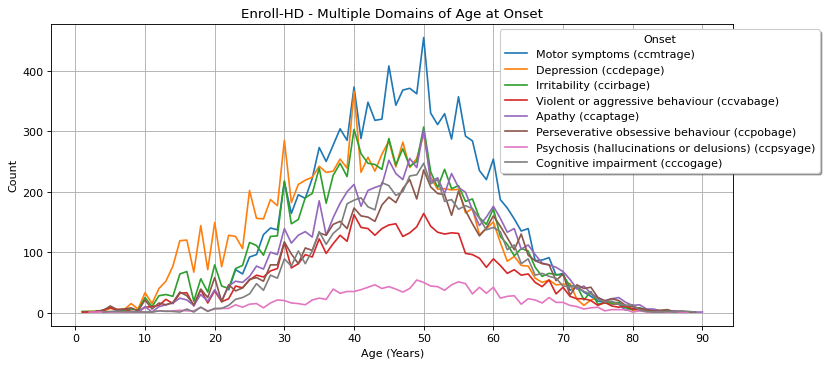

In [23]:
## Counting of Total Patients Enrolled and its different onsets

target_pp = ['ccmtrage', 'ccdepage', 'ccirbage', 'ccvabage', 'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']
name_pp = ['Motor symptoms (ccmtrage)', 'Depression (ccdepage)', 'Irritability (ccirbage)',
           'Violent or aggressive behaviour (ccvabage)', 'Apathy (ccaptage)',
           'Perseverative obsessive behaviour (ccpobage)', 'Psychosis (hallucinations or delusions) (ccpsyage)',
           'Cognitive impairment (cccogage)']

fig, axs = plt.subplots(1,1, figsize=(11,5))
for tgt, name in zip(target_pp, name_pp):
    x1, y1 = np.unique(hd_imputed_df.groupby('subjid').last()[tgt], return_counts=True)
    sns.lineplot(x=x1, y=y1, palette= 'deep', label=name)
    plt.xticks(range(0, 91, 10))
    plt.xlabel('Age (Years)')
    plt.ylabel('Count')
    plt.title('Enroll-HD - Multiple Domains of Age at Onset')
plt.legend(bbox_to_anchor=(0.65, 1), loc='upper left', title='Onset', shadow=True)
plt.grid()
plt.show()

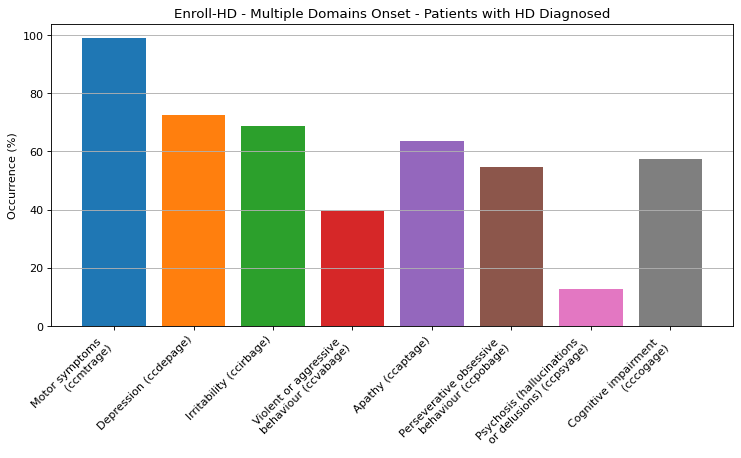

In [24]:
## Counting of Total Patients Enrolled 

target_pp = ['ccmtrage', 'ccdepage', 'ccirbage', 'ccvabage', 'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']
name_pp = ['Motor symptoms \n(ccmtrage)', 'Depression (ccdepage)', 'Irritability (ccirbage)',
           'Violent or aggressive \nbehaviour (ccvabage)', 'Apathy (ccaptage)',
           'Perseverative obsessive \nbehaviour (ccpobage)', 'Psychosis (hallucinations \nor delusions) (ccpsyage)',
           'Cognitive impairment \n(cccogage)']

fig, axs = plt.subplots(1,1, figsize=(11,5))
for tgt, name in zip(target_pp, name_pp):
    perc_onset = hd_imputed_df[hd_imputed_df['hddiagn']>0].groupby('subjid').first()
    perc_total = perc_onset.shape[0]
    perc_onset = perc_onset[perc_onset[tgt]>0]
    perc_subset = perc_onset.shape[0]   
    x = name
    y = (perc_subset/perc_total)*100
    plt.bar(x, y)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Occurrence (%)')
    plt.title('Enroll-HD - Multiple Domains Onset - Patients with HD Diagnosed')
plt.grid(axis='y')
plt.show()

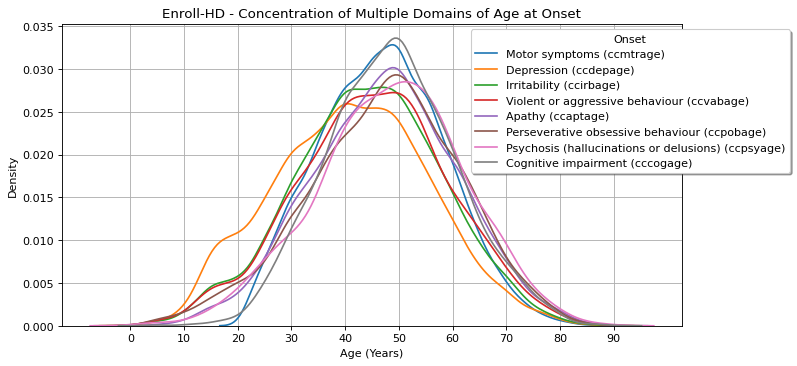

In [25]:
## Counting of Total Patients Enrolled and its different onsets

target_pp = ['ccmtrage', 'ccdepage', 'ccirbage', 'ccvabage', 'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']
name_pp = ['Motor symptoms (ccmtrage)', 'Depression (ccdepage)', 'Irritability (ccirbage)',
           'Violent or aggressive behaviour (ccvabage)', 'Apathy (ccaptage)',
           'Perseverative obsessive behaviour (ccpobage)', 'Psychosis (hallucinations or delusions) (ccpsyage)',
           'Cognitive impairment (cccogage)']

fig, axs = plt.subplots(1,1, figsize=(10,5))
for tgt, name in zip(target_pp, name_pp):
#     x1, y1 = np.unique(hd_imputed_df.groupby('subjid').first()[tgt], return_counts=True)
    sns.kdeplot(hd_imputed_df.groupby('subjid').last(), x=tgt, palette= 'deep', label=name)
    plt.xticks(range(0, 91, 10))
    plt.xlabel('Age (Years)')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Enroll-HD - Concentration of Multiple Domains of Age at Onset')
plt.legend(bbox_to_anchor=(0.65, 1), loc='upper left', title='Onset', shadow=True)
plt.grid()
plt.show()

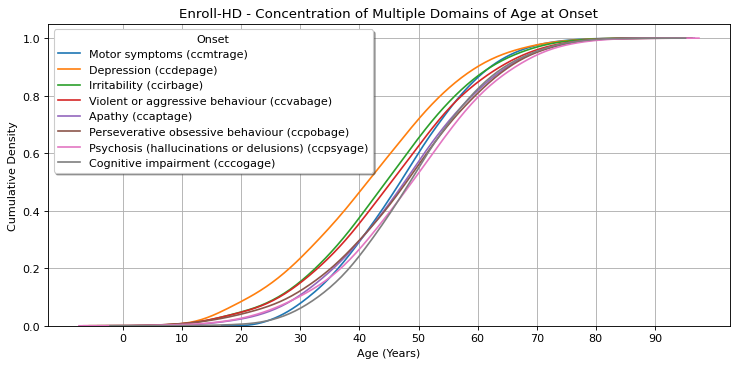

In [26]:
## Counting of Total Patients Enrolled and its different onsets

target_pp = ['ccmtrage', 'ccdepage', 'ccirbage', 'ccvabage', 'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']
name_pp = ['Motor symptoms (ccmtrage)', 'Depression (ccdepage)', 'Irritability (ccirbage)',
           'Violent or aggressive behaviour (ccvabage)', 'Apathy (ccaptage)',
           'Perseverative obsessive behaviour (ccpobage)', 'Psychosis (hallucinations or delusions) (ccpsyage)',
           'Cognitive impairment (cccogage)']

fig, axs = plt.subplots(1,1, figsize=(11,5))
for tgt, name in zip(target_pp, name_pp):
#     x1, y1 = np.unique(hd_imputed_df.groupby('subjid').first()[tgt], return_counts=True)
    sns.kdeplot(hd_imputed_df.groupby('subjid').last(), x=tgt, palette= 'deep', label=name, cumulative=True)
    plt.xticks(range(0, 91, 10))
    plt.xlabel('Age (Years)')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.title('Enroll-HD - Concentration of Multiple Domains of Age at Onset')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', title='Onset', shadow=True)
plt.grid()
plt.show()

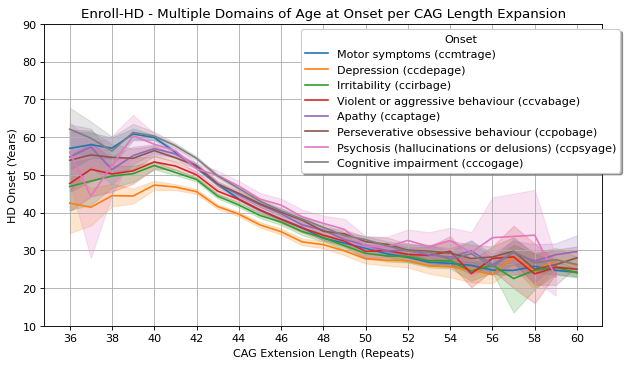

In [32]:
## Counting of Total Patients Enrolled and its different onsets

target_pp = ['ccmtrage', 'ccdepage', 'ccirbage', 'ccvabage', 'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']
name_pp = ['Motor symptoms (ccmtrage)', 'Depression (ccdepage)', 'Irritability (ccirbage)',
           'Violent or aggressive behaviour (ccvabage)', 'Apathy (ccaptage)',
           'Perseverative obsessive behaviour (ccpobage)', 'Psychosis (hallucinations or delusions) (ccpsyage)',
           'Cognitive impairment (cccogage)']

fig, axs = plt.subplots(1,1, figsize=(9,5))
for tgt, name in zip(target_pp, name_pp):
    feat_study_set = hd_imputed_df.groupby('subjid').first()[['caghigh', tgt]]
    feat_study_set = feat_study_set.dropna(subset = [tgt])
    
    sns.lineplot(data=feat_study_set, x="caghigh", y=tgt, palette= 'deep', label=name)
    plt.xticks(range(36, 61, 2))
    plt.yticks(range(10, 91, 10))
    plt.xlabel('CAG Extension Length (Repeats)')
    plt.ylabel('HD Onset (Years)')
    plt.title('Enroll-HD - Multiple Domains of Age at Onset per CAG Length Expansion')
plt.legend(bbox_to_anchor=(0.45, 1), loc='upper left', title='Onset', shadow=True)
plt.grid()
plt.show()

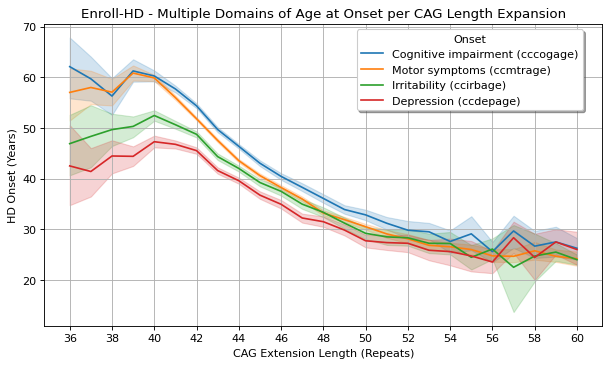

In [33]:
## Counting of Total Patients Enrolled and its different onsets

target_pp = ['cccogage', 'ccmtrage', 'ccirbage', 'ccdepage']
name_pp = ['Cognitive impairment (cccogage)', 'Motor symptoms (ccmtrage)', 
           'Irritability (ccirbage)', 'Depression (ccdepage)']

fig, axs = plt.subplots(1,1, figsize=(9,5))
for tgt, name in zip(target_pp, name_pp):
    feat_study_set = hd_imputed_df.groupby('subjid').first()[['caghigh', tgt]]
    feat_study_set = feat_study_set.dropna(subset = [tgt])
    
    sns.lineplot(data=feat_study_set, x="caghigh", y=tgt, palette= 'deep', label=name)
    plt.xticks(range(36, 61, 2))
    plt.xlabel('CAG Extension Length (Repeats)')
    plt.ylabel('HD Onset (Years)')
    plt.title('Enroll-HD - Multiple Domains of Age at Onset per CAG Length Expansion')
plt.legend(bbox_to_anchor=(0.55, 1), loc='upper left', title='Onset', shadow=True)
plt.grid()
plt.show()

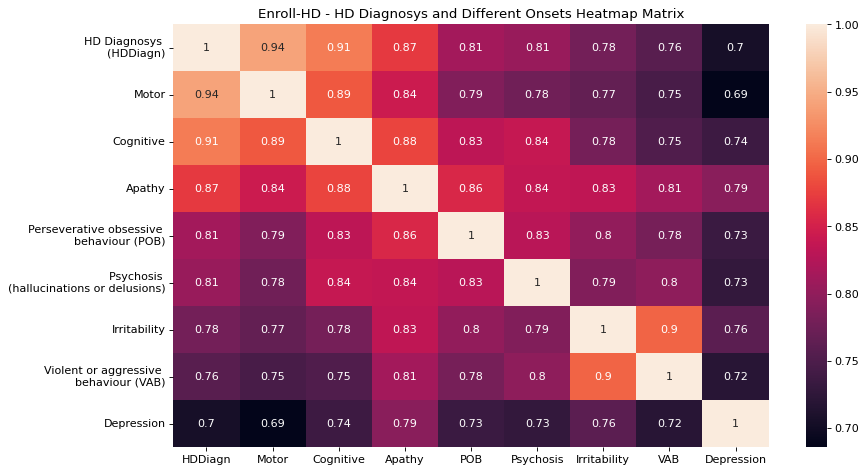

In [34]:
## Counting of Total Patients Enrolled and its different onsets
## Heatmap Matrix

onsets = ['hddiagn','ccmtrage', 'cccogage', 'ccaptage', 'ccpobage', 'ccpsyage', 'ccirbage', 'ccvabage', 'ccdepage']
y_axis_labels = ['HD Diagnosys \n(HDDiagn)','Motor', 'Cognitive', 'Apathy', 'Perseverative obsessive \nbehaviour (POB)',
                 'Psychosis \n(hallucinations or delusions)', 'Irritability', 'Violent or aggressive \nbehaviour (VAB)', 'Depression']
x_axis_labels = ['HDDiagn','Motor', 'Cognitive', 'Apathy', 'POB', 'Psychosis', 'Irritability', 'VAB', 'Depression']

subset_train = hd_imputed_df.groupby('subjid').first().loc[:, onsets]
cor = subset_train.corr()
plt.figure(figsize = (12,7))
sns.heatmap(cor, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Enroll-HD - HD Diagnosys and Different Onsets Heatmap Matrix')
plt.show()

## -------------------------------------------------------------------